In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['date_added'] = df['date_added'].fillna('Unknown')
df['date_added'] = df['date_added'].replace("Unknown", pd.NA)
df = df.dropna(subset=['rating'])

In [ ]:
directors_real = df[df['director'].notna() & (df['director'] != 'Unknown')]
directors_real['director_list'] = directors_real['director'].str.split(', ')
all_directors = directors_real.explode('director_list')
director_counts = all_directors['director_list'].value_counts()
director_counts.head(10)
actors_real = df[df['cast'].notna() & (df['cast'] != 'Unknown')]
actors_real['cast_list'] = actors_real['cast'].str.split(', ')
all_actors = actors_real.explode('cast_list')
actor_counts = all_actors['cast_list'].value_counts()
actor_counts.head(10)




,count
cast_list,
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Takahiro Sakurai,32
Naseeruddin Shah,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30
Yuki Kaji,29


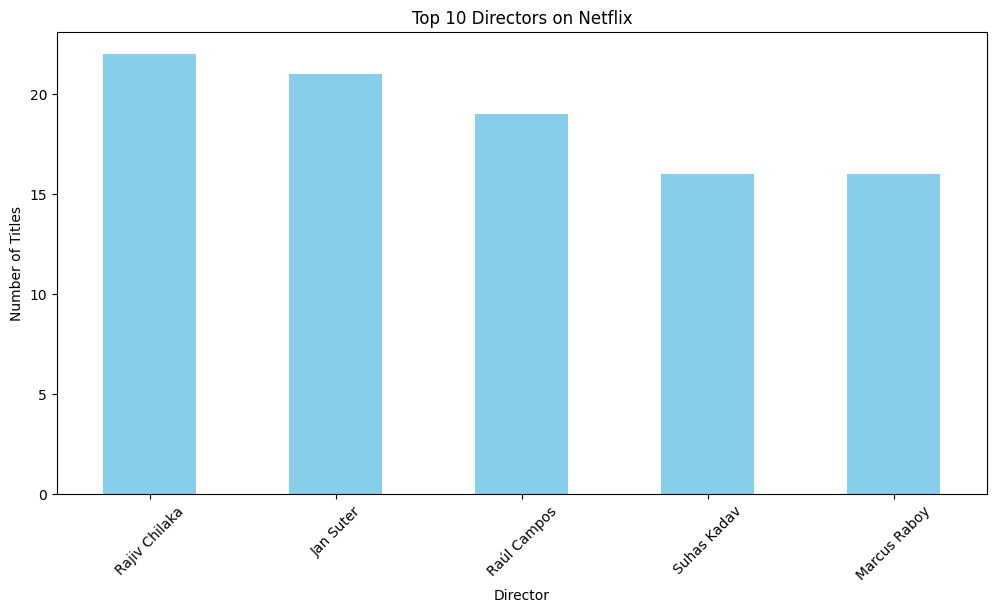

In [ ]:
top_directors = director_counts.head()
plt.figure(figsize=(12,6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

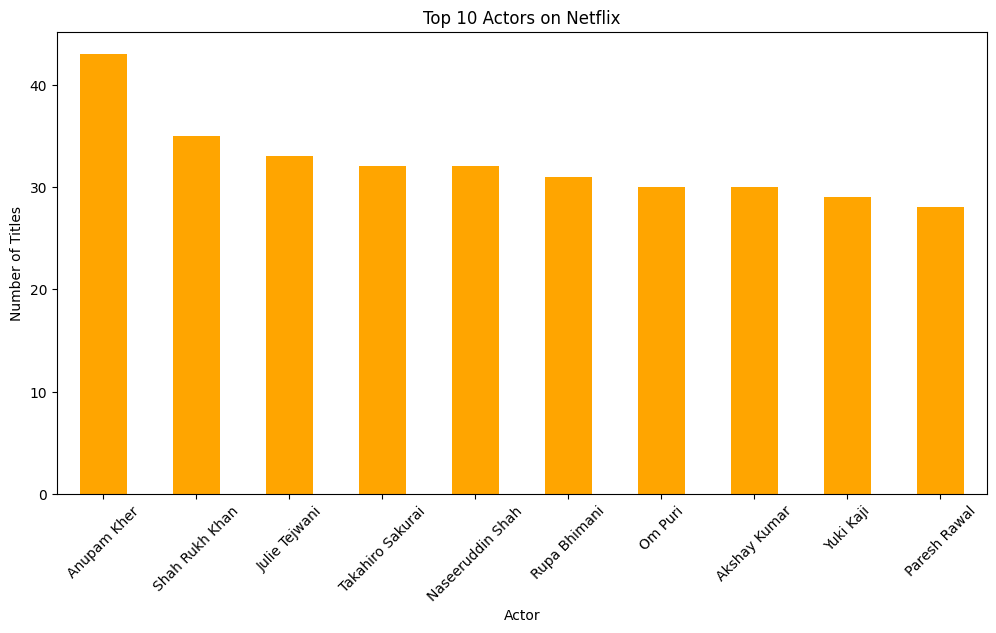

In [ ]:
top_actors = actor_counts.head(10)

plt.figure(figsize=(12,6))
top_actors.plot(kind='bar', color='orange')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

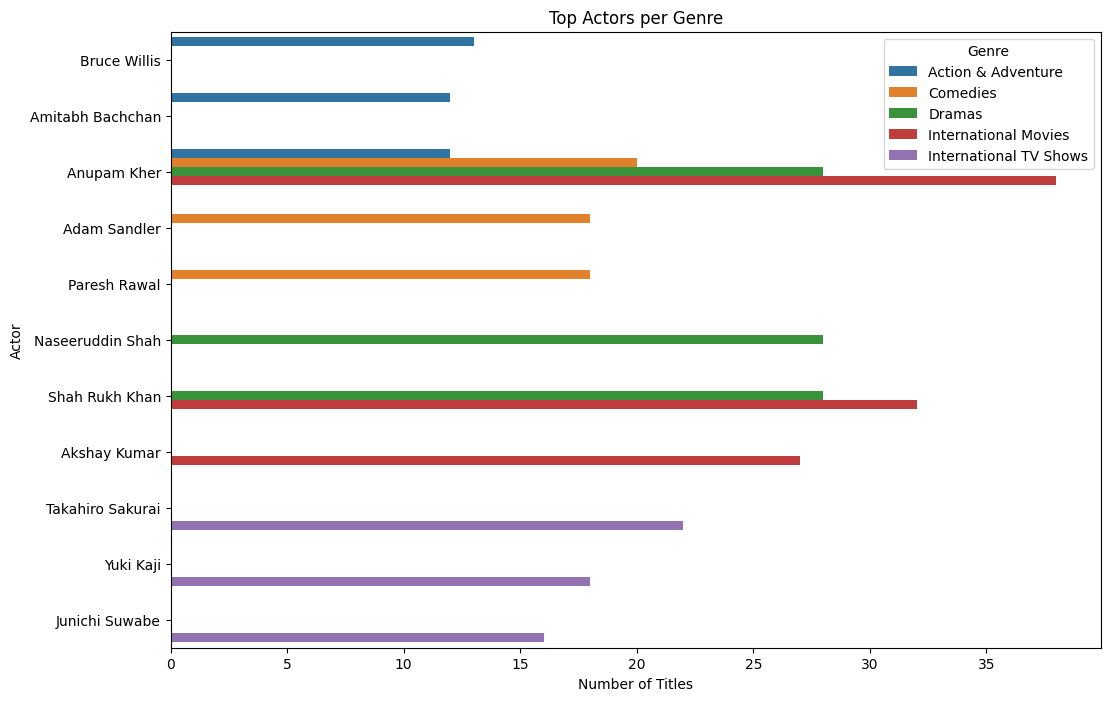

In [ ]:
df['genres'] = df['listed_in'].str.split(', ')
df_genres = df.explode('genres')
all_actors_with_genres = all_actors.merge(df_genres[['show_id', 'genres']], on='show_id', how='left')

top_5_genres = all_actors_with_genres['genres'].value_counts().head(5).index

actor_genre_counts = all_actors_with_genres[all_actors_with_genres['genres'].isin(top_5_genres)].groupby(['genres','cast_list']).size().reset_index(name='count')

top_actor_genre = actor_genre_counts.sort_values(['genres','count'], ascending=[True,False]).groupby('genres').head(3)

plt.figure(figsize=(12,8))
sns.barplot(x='count', y='cast_list', hue='genres', data=top_actor_genre)
plt.title('Top Actors per Genre')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.legend(title='Genre')
plt.show()

In [ ]:
df['date_added'].head(6)


,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"


In [ ]:
df['director'] = df['director'].fillna('Unknown')
print(df['director'].isnull().sum())
df['duration'] = df['duration'].astype(str).str.split()
df['type'].value_counts()

0


,count
type,
Movie,6129
TV Show,2674


In [ ]:
(df['type'].value_counts(normalize= True)* 100).round(2)

,proportion
type,
Movie,69.62
TV Show,30.38


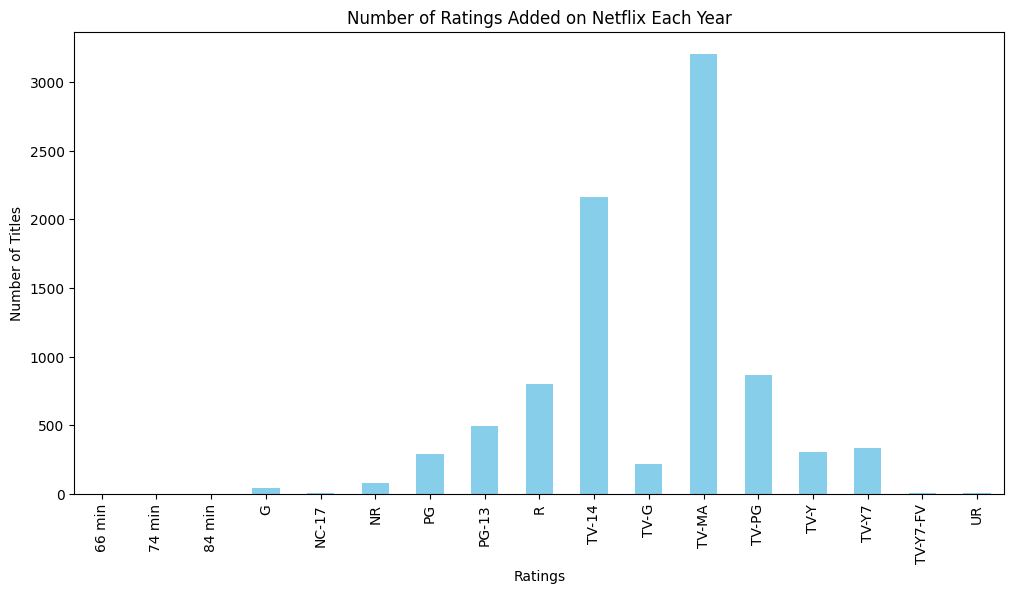

In [ ]:
df['rating'].value_counts().tail(10)
ratings_per_year = df['rating'].value_counts().sort_index()
plt.figure(figsize=(12,6))
ratings_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings Added on Netflix Each Year')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], errors = 'coerce')
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index()

,count
year_added,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,417


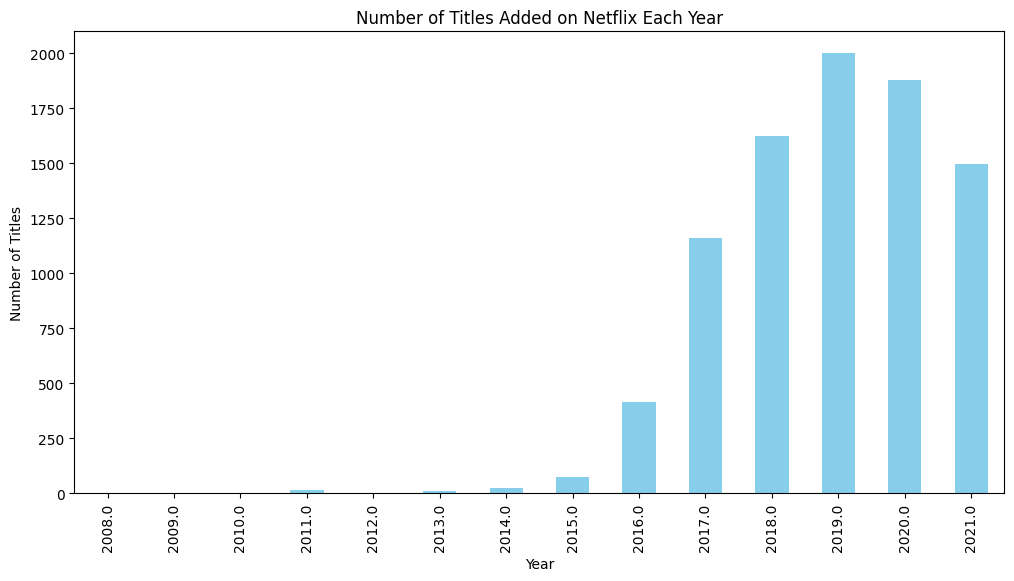

In [ ]:
titles_per_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,6))
titles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added on Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
df['type'].unique()
df['type'].value_counts()
movies_per_year = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()
tv_per_year = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()


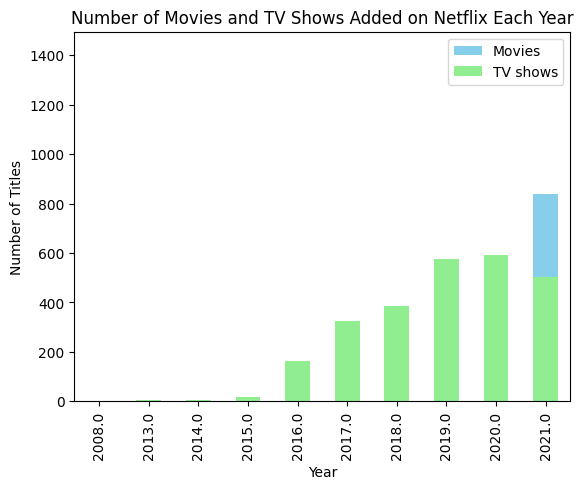

In [ ]:
movies_per_year.plot(kind='bar', color='skyblue', label='Movies')
tv_per_year.plot(kind='bar', color='lightgreen', label='TV shows')
plt.title('Number of Movies and TV Shows Added on Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

In [ ]:
movies_per_year.idxmax()
tv_per_year.idxmax()
total_per_year = movies_per_year.idxmax() + tv_per_year.idxmax()
print(total_per_year)

4039.0


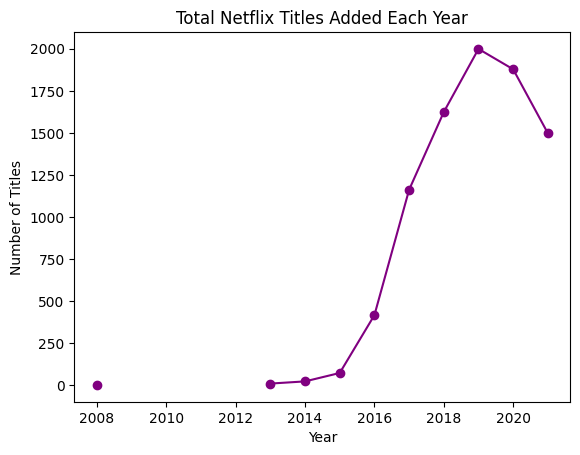

In [ ]:
total_titles_per_year = movies_per_year + tv_per_year
total_titles_per_year.plot(kind = 'line', marker = 'o', color = 'purple')
plt.title('Total Netflix Titles Added Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

Minimum movies year added: 2008.0
Maximum movies year added: 2021.0
Number of titles added after 2015: 8578
Value counts for type in recent years:
 type
Movie      6028
TV Show    2550
Name: count, dtype: int64


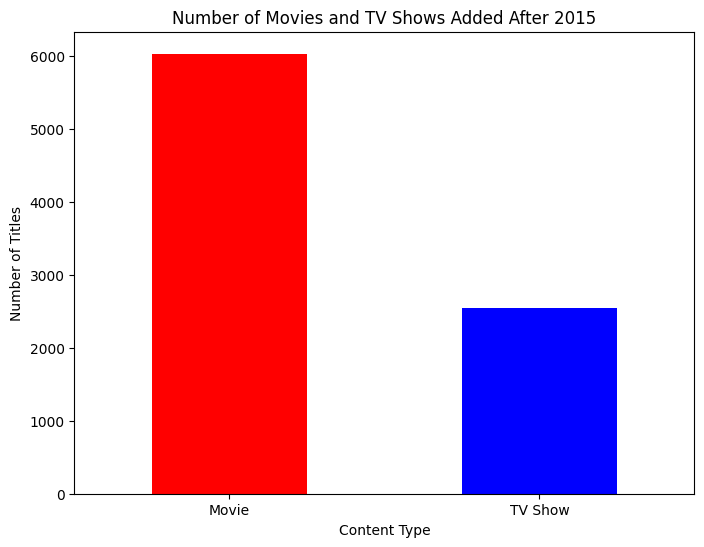

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], errors = 'coerce')
df['year_added'] = df['date_added'].dt.year
df_recent = df[df['year_added'] > 2015].copy()
recent_type_counts = df_recent['type'].value_counts()

print("Minimum movies year added:", df['year_added'].min())
print("Maximum movies year added:", df['year_added'].max())
print("Number of titles added after 2015:", df_recent.shape[0])
print("Value counts for type in recent years:\n", recent_type_counts)

plt.figure(figsize=(8, 6))
recent_type_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Number of Movies and TV Shows Added After 2015')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df["listed_in"].head()


,listed_in
0,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries"
2,"Crime TV Shows, International TV Shows, TV Act..."
3,"Docuseries, Reality TV"
4,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df['genres'] = df['listed_in'].str.split(',').apply(lambda x: [genre.strip() for genre in x])
all_genres = df['genres'].explode()
genre_counts = all_genres.value_counts()
print(genre_counts)

genres
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      580
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                

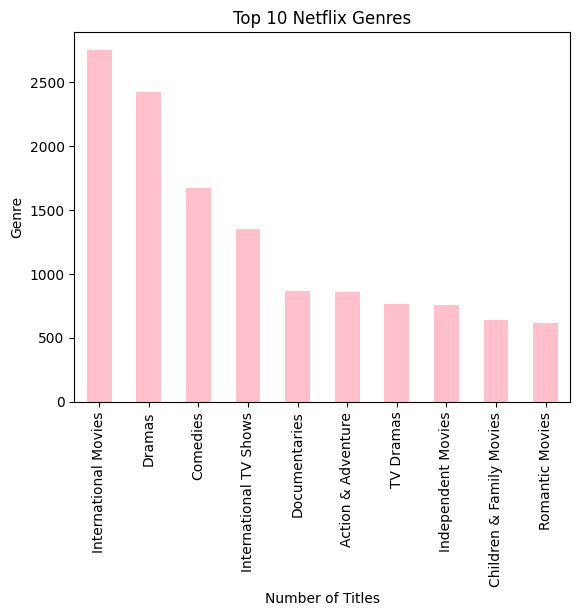

In [ ]:
genre_counts.head(10).plot(kind='bar', color='pink')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

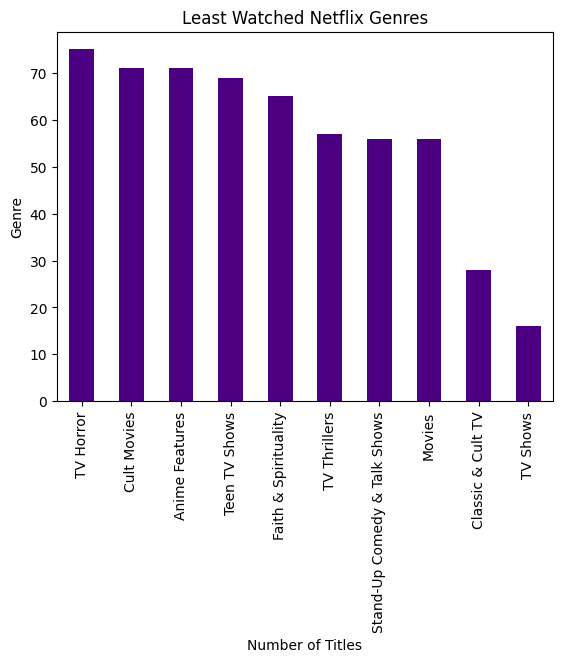

In [ ]:
genre_counts.tail(10).plot(kind='bar', color='indigo')
plt.title('Least Watched Netflix Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

In [ ]:
genre_year = df.explode('genres').groupby(['year_added', 'genres']).size()
genre_year.head()

year_added  genres                      
2008.0      Dramas                          1
            Independent Movies              1
            Stand-Up Comedy & Talk Shows    1
            Thrillers                       1
2009.0      Dramas                          1
dtype: int64

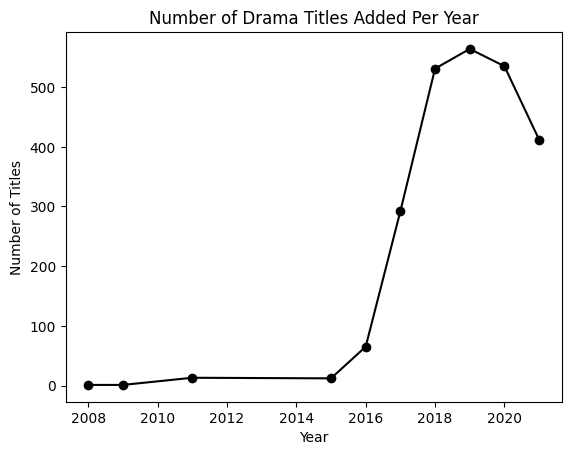

In [ ]:
drama_per_year = genre_year[:, 'Dramas']
drama_per_year.plot(kind='line', marker='o', color='black')
plt.title('Number of Drama Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

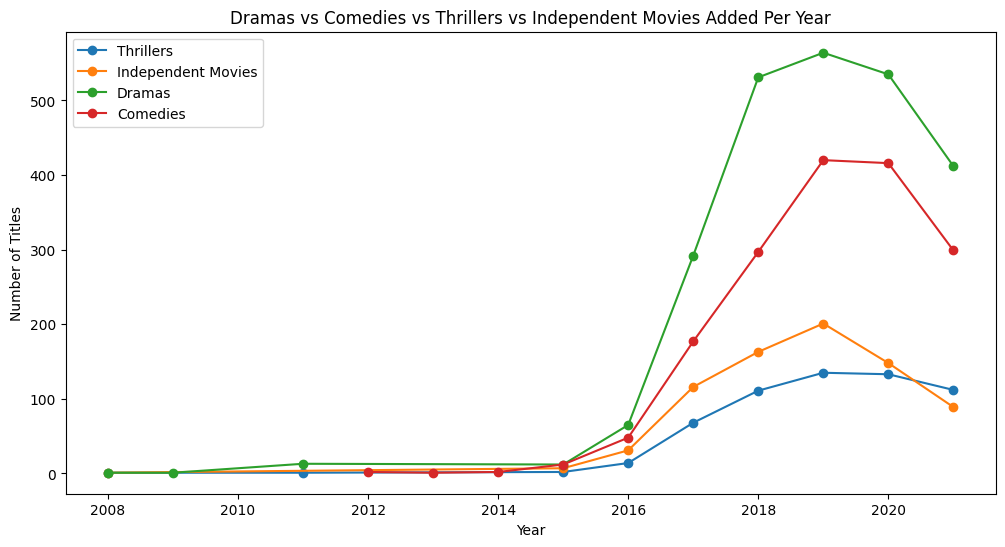

In [ ]:
plt.figure(figsize=(12, 6))
comedies_per_year = genre_year[:, 'Comedies']
Thrillers_per_year = genre_year[:, 'Thrillers']
Independent_Movies_per_year = genre_year[:, 'Independent Movies']
plt.plot(Thrillers_per_year, label='Thrillers', marker='o')
plt.plot(Independent_Movies_per_year, label='Independent Movies', marker='o')
plt.plot(drama_per_year, label='Dramas', marker='o')
plt.plot(comedies_per_year, label= 'Comedies', marker='o')
plt.title('Dramas vs Comedies vs Thrillers vs Independent Movies Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

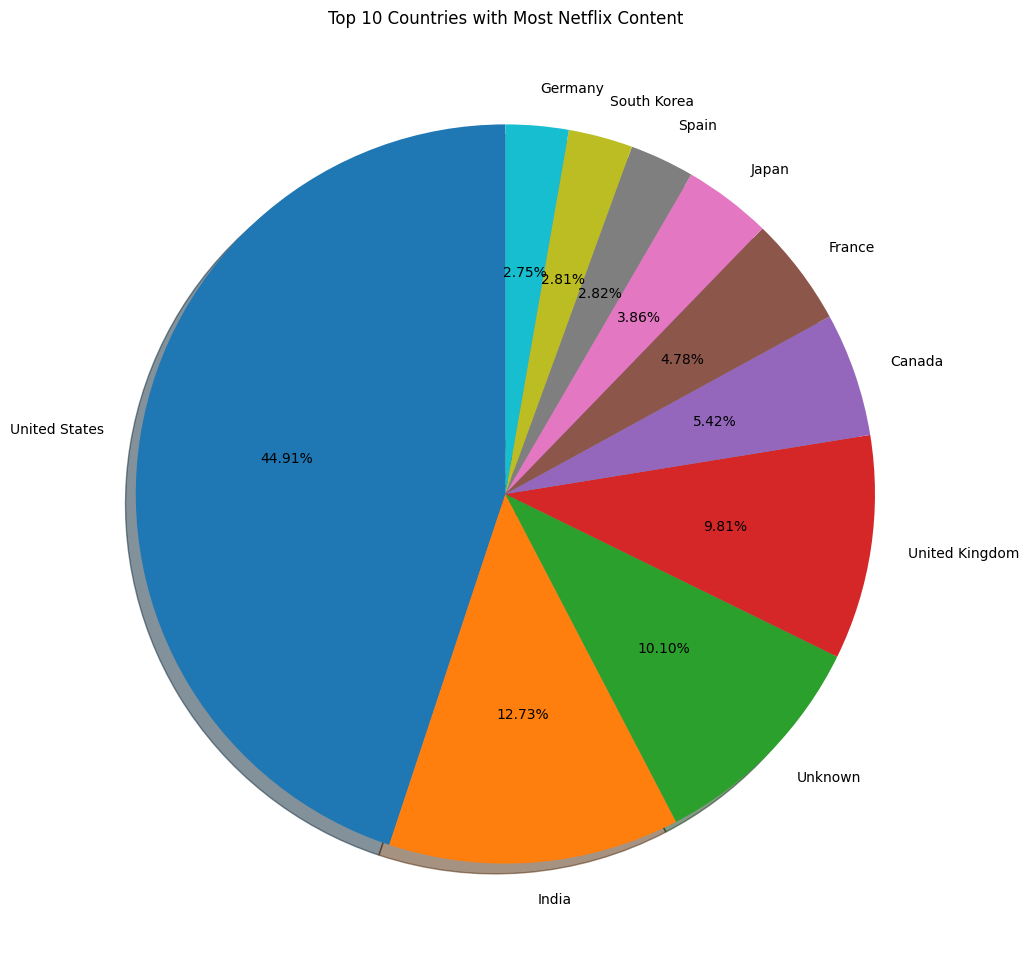

In [ ]:
country_series = df['country'].str.split(',').explode().str.strip()
country_val = country_series.value_counts()
top_countries = country_val[:10]
top_country_names = top_countries.index

# Plot pie chart
plt.figure(figsize=(12,12))
plt.pie(top_countries,
        labels=top_country_names,
        autopct='%1.2f%%',
        startangle=90,
        shadow=True)
plt.title("Top 10 Countries with Most Netflix Content")
plt.show()

In [ ]:
df['genres'] = df["listed_in"].str.split(', ')
df_explode = df.explode('genres')
movies_df = df_explode[df_explode['type'] == 'Movie']
tv_df = df_explode[df_explode['type'] == 'TV Show']
movie_genre_counts = movies_df['genres'].value_counts()
tv_genre_counts = tv_df['genres'].value_counts()
print(movie_genre_counts)
print(tv_genre_counts)

genres
International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        56
Name: count, dtype: int64
genres
International TV Shows          1350
TV Dramas                        763
TV Comedies                      580
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
Brit

In [ ]:
movies_genre_year  = movies_df.groupby(['year_added', 'genres']).size()
tv_genre_year  = tv_df.groupby(['year_added', 'genres']).size()
tv_genre_year.tail()

year_added  genres             
2021.0      TV Mysteries           22
            TV Sci-Fi & Fantasy    20
            TV Shows                5
            TV Thrillers           13
            Teen TV Shows          18
dtype: int64

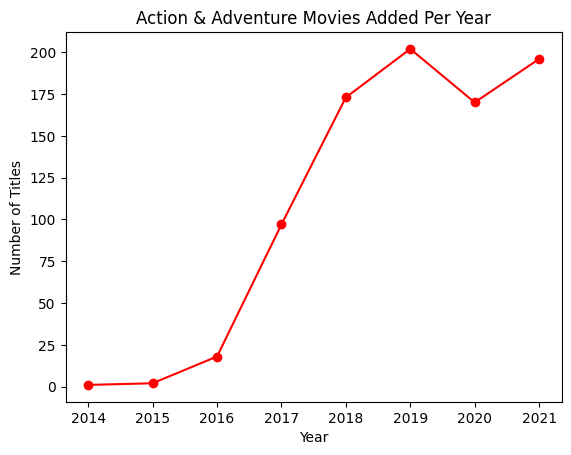

In [ ]:
action_movies = movies_genre_year[:, 'Action & Adventure']
action_movies.plot(kind='line', marker='o', color='red')
plt.title('Action & Adventure Movies Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


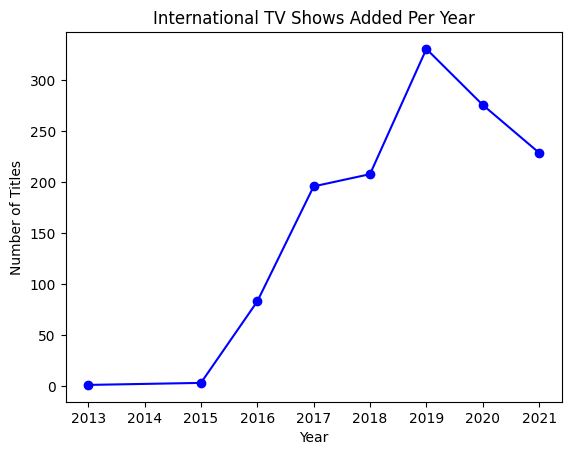

In [ ]:
International_TV_Shows = tv_genre_year[:, 'International TV Shows']
International_TV_Shows.plot(kind='line', marker='o', color='blue')
plt.title('International TV Shows Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

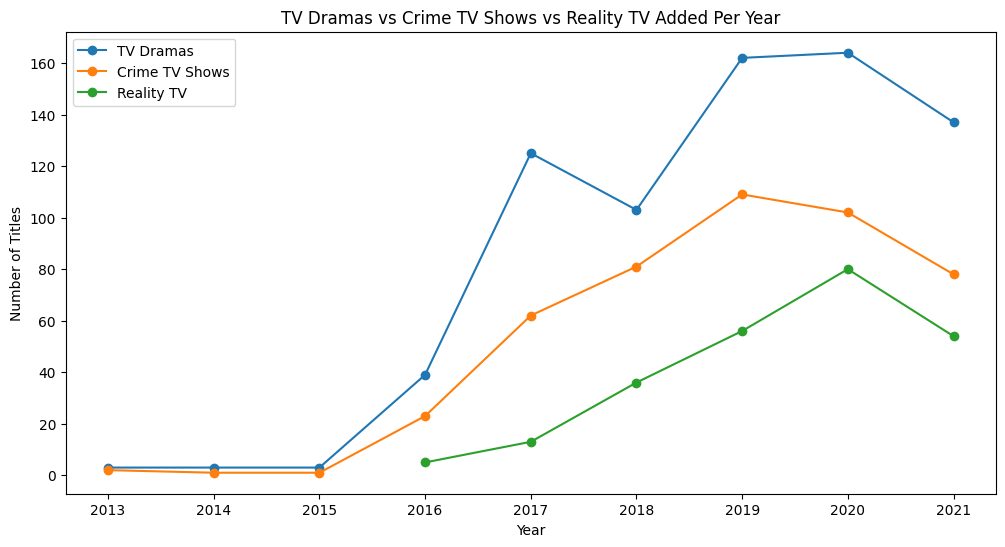

In [ ]:
TV_Dramas_per_year = tv_genre_year[:, 'TV Dramas']
Crime_TV_Shows = tv_genre_year[:, 'Crime TV Shows']
Reality_per_year = tv_genre_year[:, 'Reality TV']

plt.figure(figsize=(12,6))

plt.plot(TV_Dramas_per_year, label='TV Dramas', marker='o')
plt.plot(Crime_TV_Shows, label= "Crime TV Shows", marker='o')
plt.plot(Reality_per_year, label='Reality TV', marker='o')

plt.title('TV Dramas vs Crime TV Shows vs Reality TV Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

In [ ]:
df['country_list'] = df['country'].str.split(', ')
all_coutries = df['country_list'].explode()
country_counts = all_coutries.value_counts()
print(country_counts)

country_list
United States     3689
India             1046
Unknown            830
United Kingdom     804
Canada             445
                  ... 
Sudan                1
Panama               1
Uganda               1
East Germany         1
Montenegro           1
Name: count, Length: 128, dtype: int64


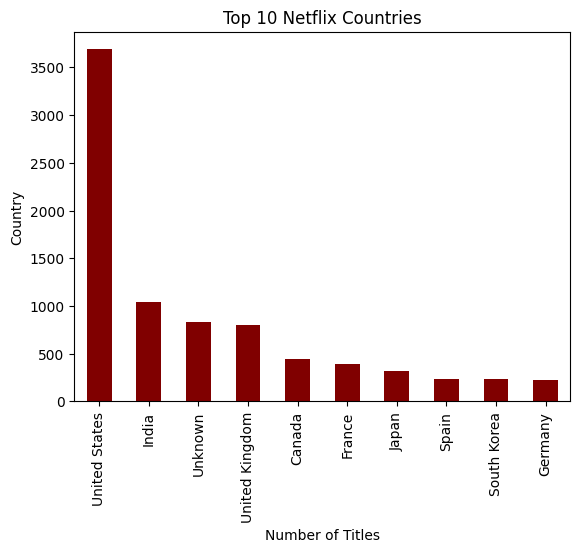

In [ ]:
country_counts.head(10).plot(kind='bar', color='maroon')
plt.title('Top 10 Netflix Countries')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [ ]:
country_year = df.explode('country_list').groupby(['year_added', 'country_list']).size()
country_year.head()

year_added  country_list 
2008.0      United States    2
2009.0      Denmark          1
            United States    1
2010.0      United States    1
2011.0      France           2
dtype: int64

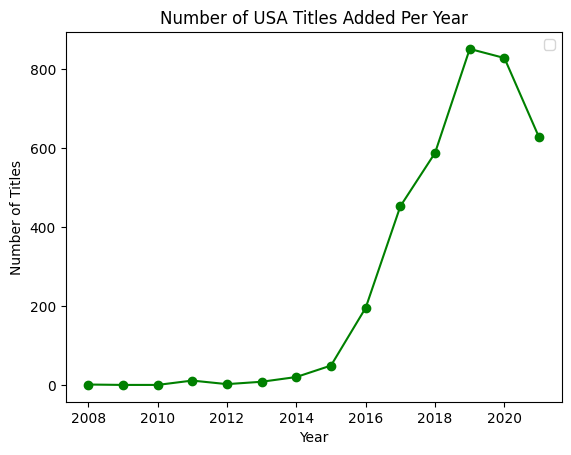

In [ ]:
usa_per_year = country_year[:, 'United States']
usa_per_year.plot(kind='line', marker = 'o', color = 'green')
plt.title('Number of USA Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

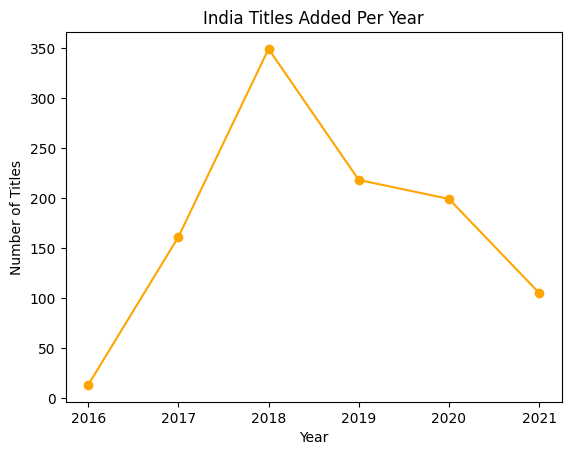

In [ ]:
india_per_year = country_year[:, 'India']
india_per_year.plot(kind='line', marker='o', color='orange')
plt.title('India Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

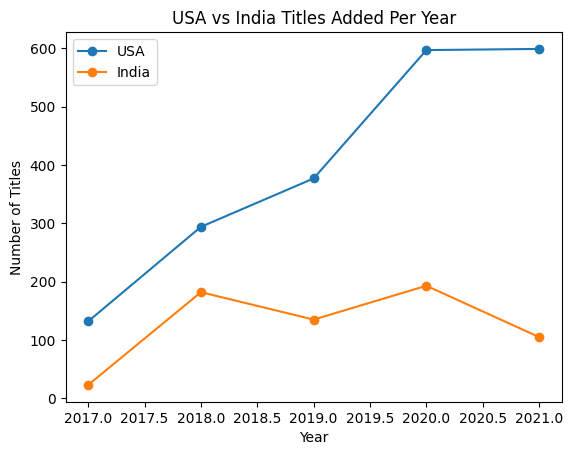

In [ ]:
plt.plot(usa_per_year, label='USA', marker='o')
plt.plot(india_per_year, label='India', marker='o')
plt.title('USA vs India Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

In [ ]:
df_exploded = df.explode('country_list').explode('genres')

In [ ]:
movies_df = df_exploded[df_exploded['type'] == 'Movie']
tv_df = df_exploded[df_exploded['type'] == 'TV Show']
genre_country_counts = movies_df.groupby(['country_list', 'genres']).size().unstack(fill_value=0)
top_countries = genre_country_counts.sum(axis=1).sort_values(ascending=False).head(10).index
genre_country_counts_top = genre_country_counts.loc[top_countries]



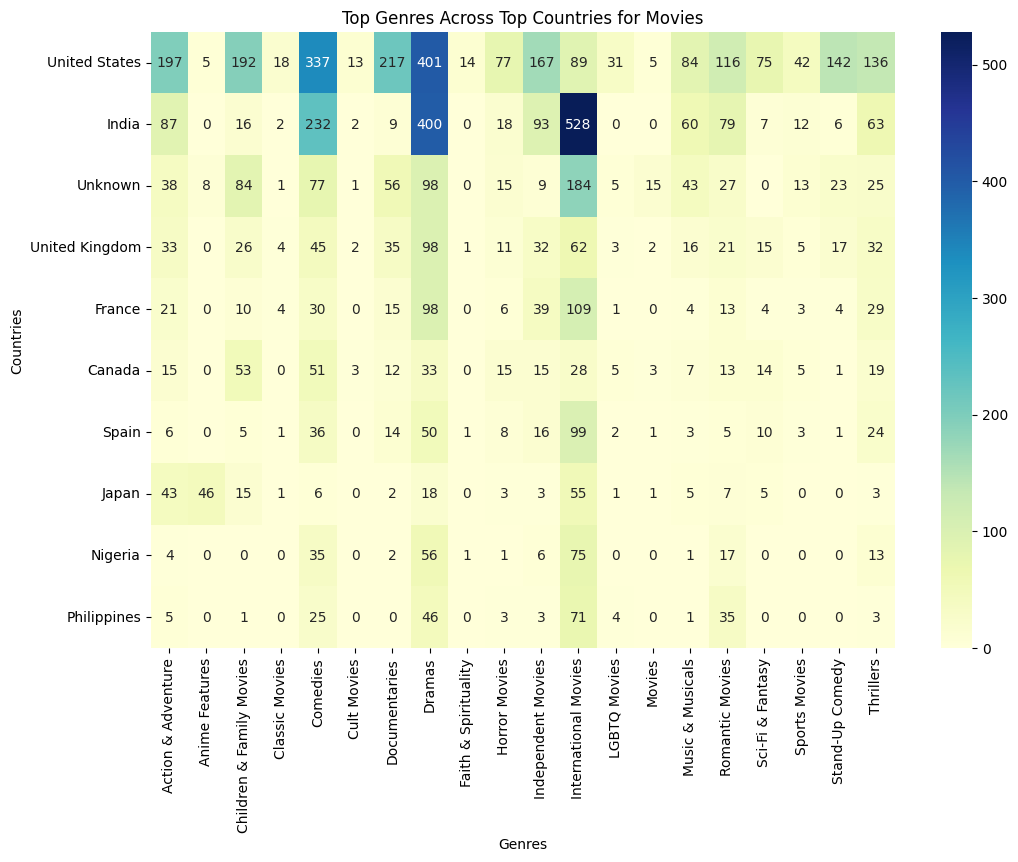

In [ ]:
tv_df = df_exploded[df_exploded['type'] == 'TV Show']
tv_genre_country_counts = tv_df.groupby(['country_list', 'genres']).size().unstack(fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(genre_country_counts_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Genres Across Top Countries for Movies')
plt.xlabel('Genres')
plt.ylabel('Countries')
plt.show()

Darker colors → more titles in that genre-country combo

Lighter colors → fewer titles


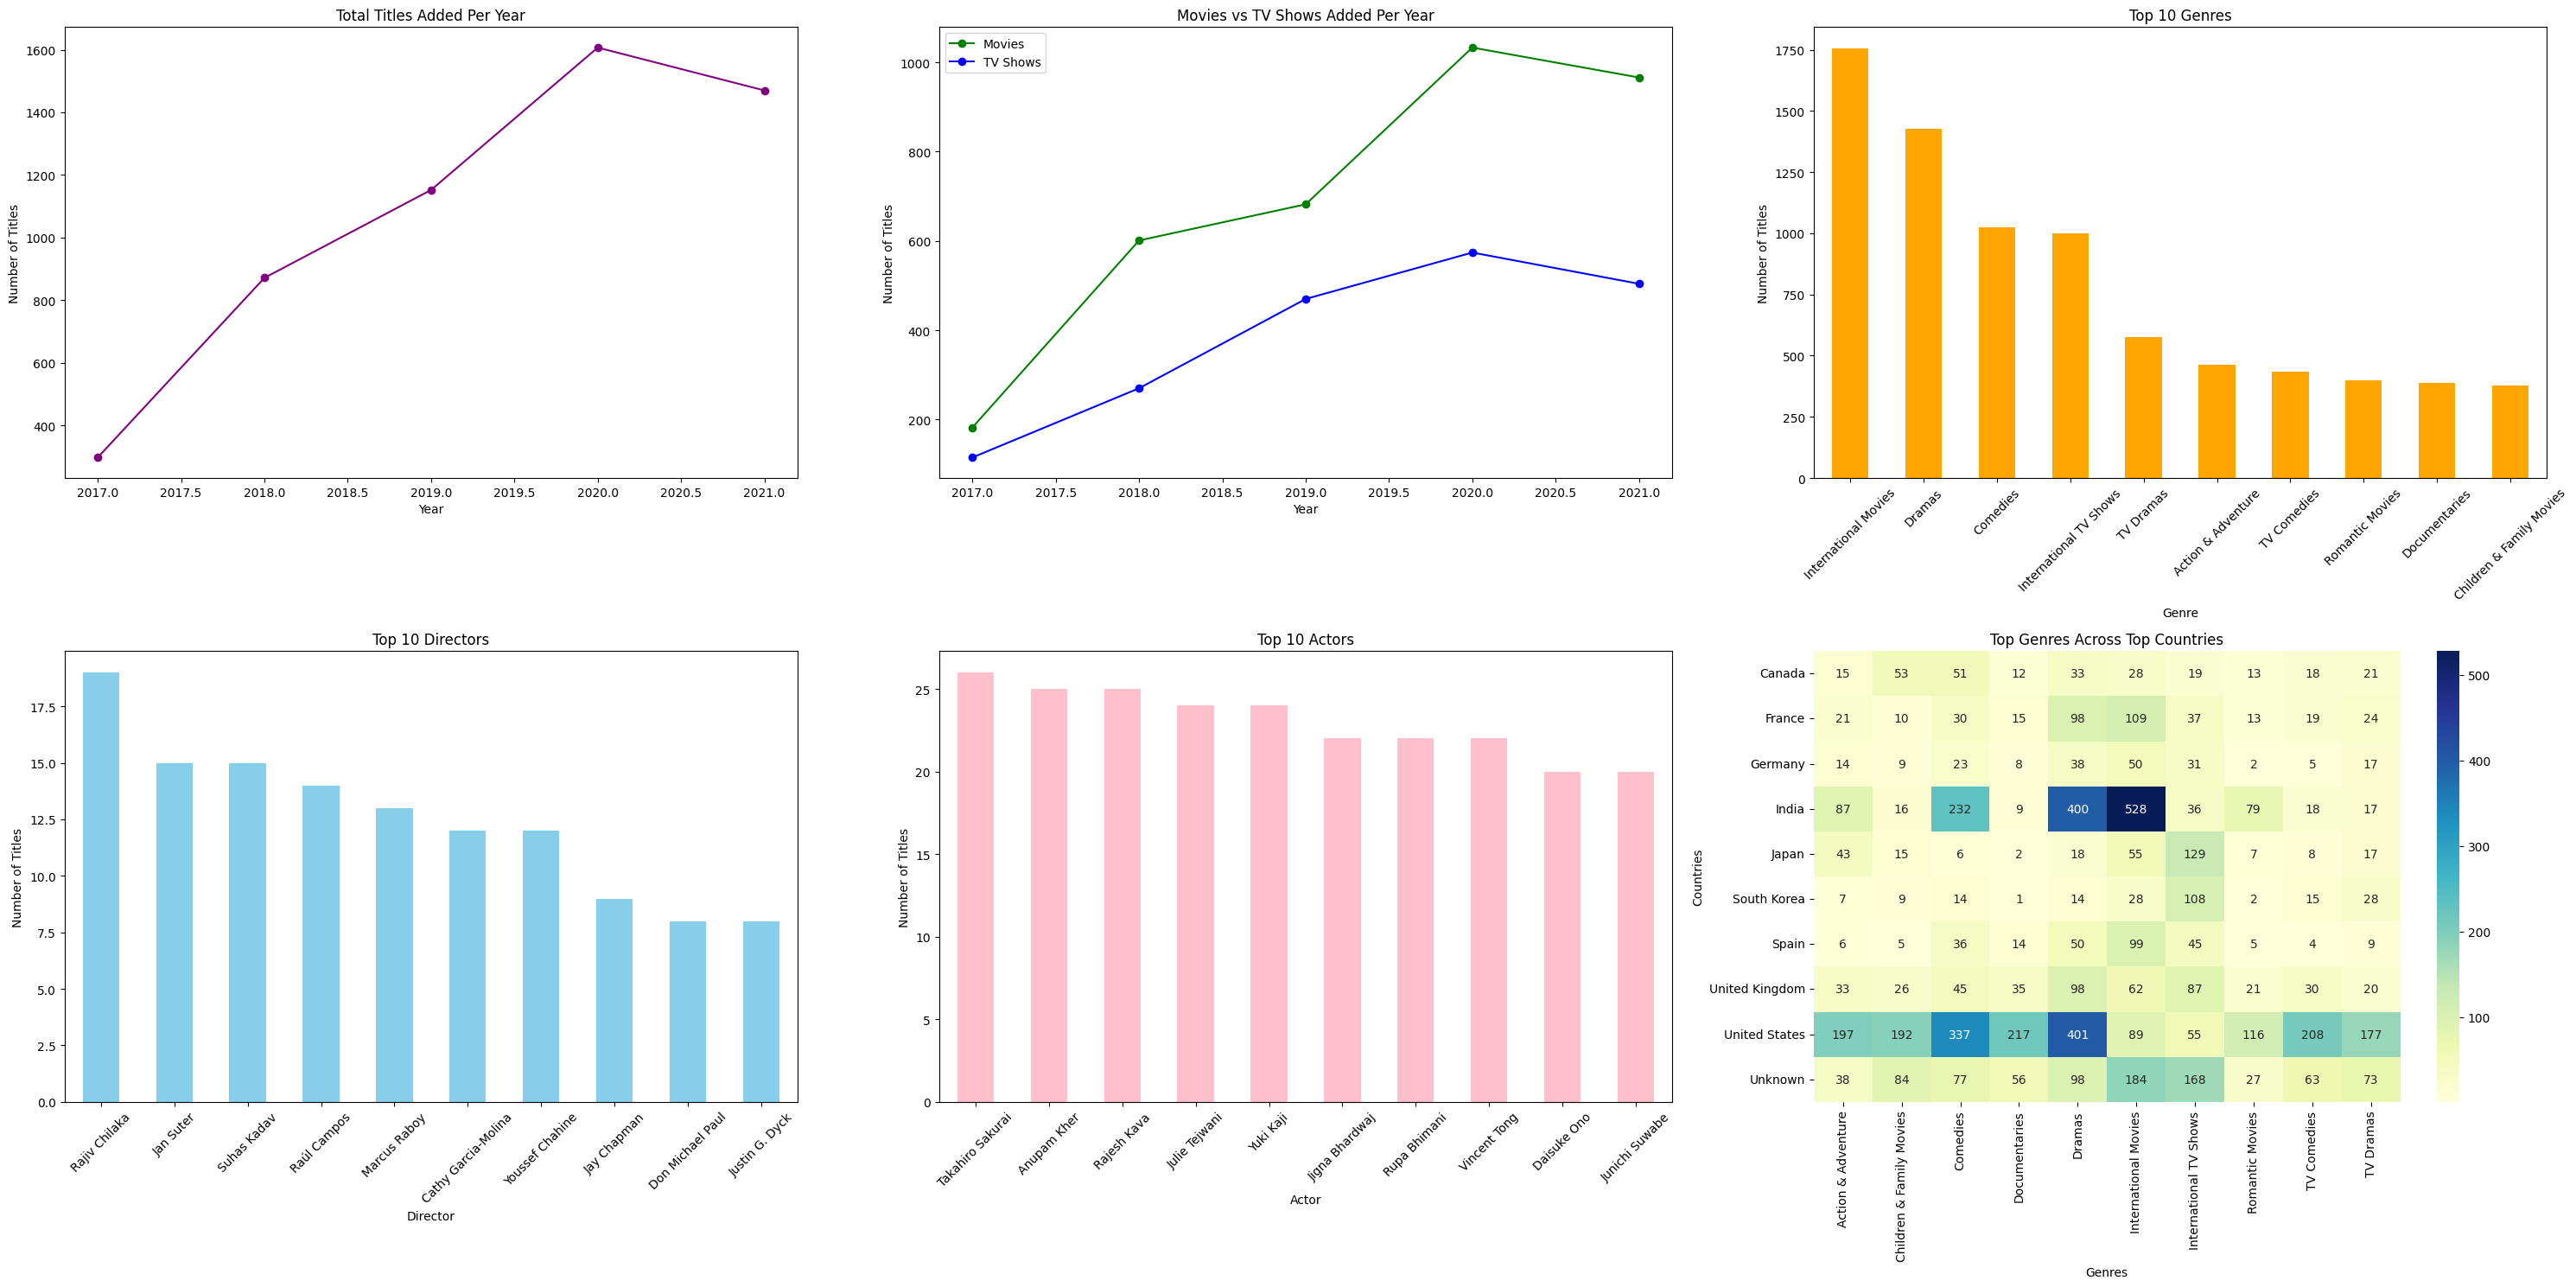

In [ ]:
plt.figure(figsize=(30,15))


plt.subplot(2,3,1)
total_titles_per_year.plot(kind='line', marker='o', color='purple')
plt.title('Total Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')


plt.subplot(2,3,2)
plt.plot(movies_per_year, label='Movies', marker='o', color='green')
plt.plot(tv_per_year, label='TV Shows', marker='o', color='blue')
plt.title('Movies vs TV Shows Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()


plt.subplot(2,3,3)
genre_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)


plt.subplot(2,3,4)
director_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)


plt.subplot(2,3,5)
actor_counts.head(10).plot(kind='bar', color='pink')
plt.title('Top 10 Actors')
plt.xlabel('Actor')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)


plt.subplot(2,3,6)
top_countries = country_counts.head(10).index
top_genres = genre_counts.head(10).index
genre_country_counts_top = df_exploded[df_exploded['country_list'].isin(top_countries) & df_exploded['genres'].isin(top_genres)]
genre_country_counts_top = genre_country_counts_top.groupby(['country_list','genres']).size().unstack(fill_value=0)
sns.heatmap(genre_country_counts_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Genres Across Top Countries')
plt.xlabel('Genres')
plt.ylabel('Countries')

plt.tight_layout()
plt.show()

# ***Netflix Titles Analysis 📊***

Project Overview

This project performs an exploratory data analysis (EDA) on Netflix’s content dataset. It investigates the growth of content, genre popularity, type differences (Movies vs TV Shows), country distribution, and top directors and actors. The goal is to extract actionable insights about Netflix’s content trends over the years.

Dataset Description

The dataset contains information about Netflix titles with the following key columns:

Column	Description
title	Name of the movie or TV show
type	Content type: Movie or TV Show
director	Director(s) of the content
cast	Main actors
country	Country of production
date_added	Date added to Netflix
release_year	Original release year
rating	Content rating (PG, TV-MA, etc.)
listed_in	Genres
duration	Runtime (Movies) or number of seasons (TV Shows)
Steps Taken

***1. Data Cleaning***

Converted date_added to datetime and extracted year_added.

Filled missing values in country, director, and cast columns.

Split multi-valued columns (listed_in, cast, country, director) into lists and exploded them for easier analysis.

***2. Exploratory Analysis & Visualizations***

A. Titles Added Over Time

Counted total titles added per year.

Compared trends between Movies vs TV Shows.

Visualized growth using line charts.

B. Genre Analysis

Identified top genres and their trends over time.

Compared genre popularity across Movies and TV Shows.

Explored genre-country relationships with heatmaps.

C. Country Analysis

Counted titles per country and visualized top countries.

Tracked country trends over the years.

D. Directors & Actors

Identified most active directors and most frequently appearing actors.

Removed Unknown entries to ensure meaningful analysis.

Cross-referenced actors with genres for additional insights.

E. Combined Insights

Heatmaps for genres vs countries.

Trend lines comparing genres across Movies and TV Shows.

Bar charts for top directors and actors.

Key Insights

Netflix Content Growth

Overall titles on Netflix have steadily increased, with a significant rise in recent years.

Movies vs TV Shows

Movies dominate in count, but TV Shows are rapidly growing, especially in recent years.

Genre Popularity

Drama, Comedy, and Thrillers are consistently popular.

Certain genres are more common in Movies than TV Shows.

Country Production

USA produces the highest number of titles, followed by India and the UK.

Some genres dominate specific countries, visible through heatmaps.

Directors & Actors

Top directors consistently produce multiple titles for Netflix.

Top actors frequently appear across genres and content types.

Removing Unknown values provides a clearer view of content creators.

Visualizations

Line charts for total titles per year

Line charts for Movies vs TV Shows

Bar charts for top genres, directors, and actors

Heatmaps for top genres by country

Trend charts for genre popularity over years

Tools & Libraries

Python (Pandas, NumPy)

Matplotlib & Seaborn for visualization

Google Colab for interactive execution

Potential Extensions

Analyze content ratings (PG, R, TV-MA) trends over time.

Explore runtime and number of seasons by genre or type.

Build interactive dashboards using Plotly or Altair.

Combine country, genre, and ratings for deeper insights.

Conclusion

This analysis provides a comprehensive overview of Netflix’s content library. It highlights growth trends, popular genres, country-wise content distribution, and key creators, offering insights valuable for content strategy, recommendation systems, and trend analysis.
